In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 22 18:22:52 2020

@author: marcofking
"""


import pyabc as pyabc
from pyabc import (ABCSMC,
                   RV, Distribution,
                   MedianEpsilon,
                   LocalTransition)
from pyabc.visualization import plot_kde_2d, plot_data_callback
import matplotlib.pyplot as plt
import os
import tempfile
import numpy as np
#import scipy as sp
from scipy.integrate import odeint
import math
db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "test3.db"))


initial_contamination=1200
measurement_data = np.array([134,202,294,400,644,1232,2044,2868])
s=np.array([93.70165,86.13942,162.11107,116.61904,123.61230,396.88789,628.87201,1147.13556])
precision=5000


measurement_times = np.array([2,4,6,16,18,20,22,24])#np.arange(len(measurement_data))  



def Distance(simulation, data):
    return np.absolute((data["Contamination"] - simulation["Contamination"])/data["sd"]).sum()

# def Distance(x,y,s):

#     # computes the Euclidean distance between two lists of the same length

#     if len(x) == len(y):

#         return math.sqrt(sum([(((x[i]-y[i])/s[i])**2) for i in range(len(x))]))

#     else:

#         return 100.00


def ode_model(contamination,t,r,C,d,g):
    Contamination = contamination;
    return(r*(1-Contamination/C)-d*math.exp(-g*t)*Contamination)

# No Noise
def deterministic_run_NONOISE(parameters):#precision,initial_contamination,r,C,d,g):
    precision=5000
    tmax = 24
    time_space = np.linspace(0,tmax,precision+1)
    sim=odeint(ode_model,initial_contamination,time_space,args=(parameters["r"],parameters["C"],parameters["d"],parameters["g"]))
    #num_at_0=sim[int(precision*0.1/50.0)]
    num_at_1=sim[int(precision*1/50.0)]
    num_at_2=sim[int(precision*2/50.0)]
    num_at_4=sim[int(precision*4/50.0)]
    num_at_6=sim[int(precision*6/50.0)]
    num_at_16=sim[int(precision*16/50.0)]
    num_at_18=sim[int(precision*18/50.0)]
    num_at_20=sim[int(precision*20/50.0)]
    num_at_22=sim[int(precision*22/50.0)]
    num_at_24=sim[int(precision*24/50.0)]
    return{"Contamination":[num_at_1,num_at_2,num_at_4,num_at_6,num_at_16,num_at_18,num_at_20,num_at_22,num_at_24]}

def deterministic_run(parameters):#precision,initial_contamination,r,C,d,g):
    precision=5000
    tmax = 24
    time_space = np.linspace(0,tmax,precision+1)
    sim=odeint(ode_model,initial_contamination,time_space,args=(parameters["r"],parameters["C"],parameters["d"],parameters["g"]))
    #num_at_0=sim[int(precision*0.1/50.0)]
    #num_at_1=sim[int(precision*1/50.0)]
    num_at_2=sim[int(precision*2/50.0)]
    num_at_4=sim[int(precision*4/50.0)]
    num_at_6=sim[int(precision*6/50.0)]
    num_at_16=sim[int(precision*16/50.0)]
    num_at_18=sim[int(precision*18/50.0)]
    num_at_20=sim[int(precision*20/50.0)]
    num_at_22=sim[int(precision*22/50.0)]
    num_at_24=sim[int(precision*24/50.0)]
    #return{"Contamination":[num_at_2,num_at_4,num_at_6,num_at_16,num_at_18,num_at_20,num_at_22,num_at_24]+ sigma*np.random.randn(8)}
    return{"Contamination":[num_at_2,num_at_4,num_at_6,num_at_16,num_at_18,num_at_20,num_at_22,num_at_24]}
# def f(y, t0, theta1, theta2):
#     x1, x2 = y
#     dx1 = - theta1 * x1 + theta2 * x2
#     dx2 =   theta1 * x1 - theta2 * x2
#     return dx1, dx2
    
# def model(pars):
#     sol = sp.integrate.odeint(
#              f, init, measurement_times,
#              args=(pars["theta1"],pars["theta2"]))
#     return {"X_2": sol[:,1]}

# true_trajectory = model({"theta1": theta1_true,
#                          "theta2": theta2_true})["X_2"]

# plt.plot(true_trajectory, color="C0", label='Simulation')
# plt.scatter(measurement_times, measurement_data,
#             color="C1", label='Data')
# plt.xlabel('Time $t$')
# plt.ylabel('Measurement $Y$')
# plt.title('Conversion reaction: True parameters fit')
# plt.legend()
# plt.show()

# def distance(simulation, data):
#     return np.absolute(data["X_2"] - simulation["X_2"]).sum()

parameter_prior = Distribution(r=RV("uniform", 0.1, 1000.0),
                               C=RV("uniform", 6.0, 3000.0),
                               d=RV("uniform", 0.01, 100.0),
                               g=RV("uniform", 0.00001, 1000.0))

parameter_prior.get_parameter_names()



#Noisey model
sigma=0.02
acceptor = pyabc.StochasticAcceptor()
kernel = pyabc.IndependentNormalKernel(var=sigma**2)
eps = pyabc.Temperature()

abc = pyabc.ABCSMC(deterministic_run, parameter_prior, kernel, eps=eps, acceptor=acceptor,population_size=1000)
abc.new(db_path,{"Contamination": measurement_data}) #This distance model assumes the name of the predicited and confirmed are the same
history_acceptor = abc.run(max_nr_populations=5,minimum_epsilon=100)


#No Noise
# abc = ABCSMC(models=deterministic_run_NONOISE,
#               parameter_priors=parameter_prior,
#               distance_function=Distance,
#               population_size=50,
#               transitions=LocalTransition(k_fraction=.5),
#               eps=MedianEpsilon(500, median_multiplier=0.7))

# abc.new(db_path, {"Contamination": measurement_data,"sd":s})
# history_acceptor = abc.run(minimum_epsilon=12, max_nr_populations=10)




INFO:Sampler:Parallelizing the sampling on 8 cores.
INFO:History:Start <ABCSMC(id=17, start_time=2022-03-10 14:23:48.516408, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 10491904427.868792.
INFO:ABC:Acceptance rate: 1000 / 3397 = 2.9438e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 32782399.948240537.
INFO:ABC:Acceptance rate: 1000 / 81804 = 1.2224e-02, ESS=8.3423e+02.
INFO:ABC:t: 2, eps: 102429.99769534693.


ProcessError: At least one worker is dead.

Summary statatistics of parameters

In [ ]:
from pyabc.visualization import plot_kde_matrix

df, w = history_acceptor.get_distribution(m=0)
#plot_kde_matrix(df, w);
df.hist(color='k', alpha=0.5, bins=25)

df.describe()

name,C,d,g,r
count,100.000000,100.000000,100.000000,100.000000
mean,977.250289,45.697240,503.769912,504.559077
std,0.002251,24.717286,262.478009,257.660970
min,977.244239,4.121380,45.094341,12.692036
25%,977.248787,27.252975,281.365298,272.687182
50%,977.250294,43.134696,493.719892,488.236083
75%,977.251695,64.477944,705.930763,719.726237
max,977.256117,97.422666,981.576542,990.865738


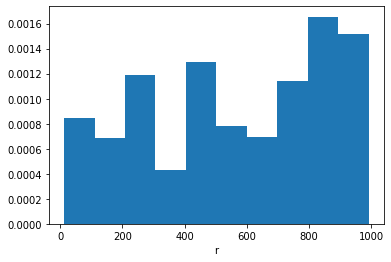

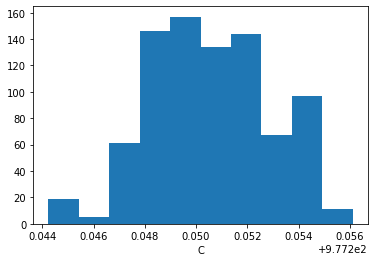

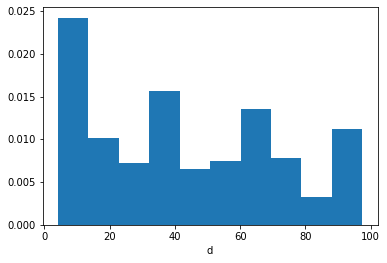

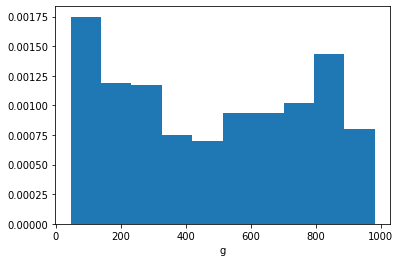

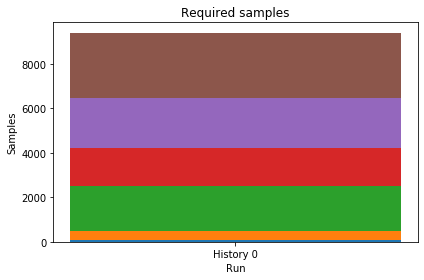

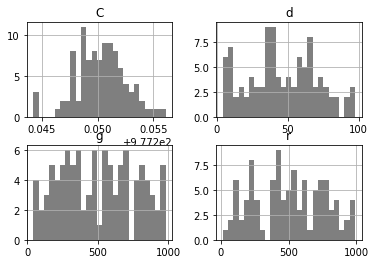

In [8]:
pyabc.visualization.plot_histogram_1d(history_acceptor,x="r")
pyabc.visualization.plot_histogram_1d(history_acceptor,x="C")
pyabc.visualization.plot_histogram_1d(history_acceptor,x="d")
pyabc.visualization.plot_histogram_1d(history_acceptor,x="g")

pyabc.visualization.plot_sample_numbers(history_acceptor)



# fig = plt.figure(figsize=(10,8))
# for t in range(history_acceptor.max_t+1):
#     ax = fig.add_subplot(3, np.ceil(history_acceptor.max_t / 3), t+1)

#     ax = plot_kde_2d(
#         *history_acceptor.get_distribution(m=0, t=t), "r", "C","d","g",
#         xmin=0, xmax=15, numx=200, ymin=0, ymax=15, numy=200, ax=ax)
#     #ax.scatter([theta1_true], [theta2_true], color="C1",
#     #            label='$\Theta$ true = {:.3f}, {:.3f}'.format(
#     #                theta1_true, theta2_true))
#     ax.set_title("Posterior t={}".format(t))

#     ax.legend()
# fig.tight_layout()



# _, ax = plt.subplots()
# for t in range(history_acceptor.max_t + 1):
#     pyabc.visualization.plot_kde_1d_highlevel(
#         history_acceptor, x="Contamination", t=t,
#         refval=measurement_data, refval_color='grey',
#         xmin=0, xmax=15, ax=ax, numx=50, label=f"Iteration {t}")
# ax.legend()
# plt.show()


# # History of acceptances
# pyabc.visualization.plot_sample_numbers(history_acceptor, labels="noisy")
# plt.show()

# ####

# _, ax = plt.subplots()

# def plot_data(sum_stat, weight, ax, **kwargs):
#     """Plot a single trajectory"""
#     ax.plot(measurement_times, sum_stat['Contamination'], color='grey', alpha=0.1)
    
# def plot_mean(sum_stats, weights, ax, **kwargs):
#     """Plot mean over all samples"""
#     weights = np.array(weights)
#     weights /= weights.sum()
#     data = np.array([sum_stat['Contamination'] for sum_stat in sum_stats])
#     mean = (data * weights.reshape((-1, 1))).sum(axis=0)
#     ax.plot(measurement_times, mean, color='C2', label='Sample mean')
    
# ax = plot_data_callback(h, plot_data, plot_mean, ax=ax)

# #plt.plot(true_trajectory, color="C0", label='Simulation')
# plt.errorbar([0,1,2,4,8,24],np.append(initial_contamination,measurement_data), yerr=[92,26,2.3,4.67,4.33,4.2], fmt='x',color="Teal")
# plt.xlabel('Time $t$')
# plt.ylabel('CFU ')
# plt.title('Time(h) after cleaning')
# plt.legend()
# plt.show()

Plot some curves 